In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.size"] = 12

In [2]:
mlflow_folder = os.path.join('/', 'data', 'mlruns', '3')

In [3]:
attack_model = 'medium'
task_name = 'fashion_mnist'
eps = '8/255.0'

In [4]:
if task_name == 'mnist':
    # params.victim.model=medium, params.victim.task_name=mnist
    mnist = {
        'small': 'd913e2bccde54ddc89ebcd5ff7848387',
        'medium': '5d05665b5a9643b58597e65ace1b4633',
        'large': 'daec10e142464fc28bcfe6d8927de21c',
    }

    fashion_mnist = {
        'small': 'c6153eb7a39447cbaae09c168a6bfbf0',
        'medium': '4d1a127ebf4044e08345b4d5a3071b90',
        'large': '701fee67b09747e5a3850c17c2d6b393',
    }

    fractal_1k = {
        'small': '7b67fb7ecc194e4fb36c3c7aa1e6018d',
        'medium': '43f3677d77e74a2b88d6cd558d0366e3',
        'large': 'a529b4d66c80426494a911d8324126eb',
    }

    fractal_60 = {
        'small': '1ea1f92c35444456b326d57788b185e1',
        'medium': '87cc72ffe8204bb3a56641da8d3c6dfe',
        'large': 'e26f84ed79334e35a773c7ccc121fa6f',
    }
elif task_name == 'fashion_mnist':
    # params.victim.model=medium, params.victim.task_name=mnist
    mnist = {
        'medium': '8e0ab011e9384899b631fb85bec0280c'
    }

    fashion_mnist = {
        'medium': '9ed8fba6f71c4394839649defc3f11d9'
    }

    fractal_1k = {
        'medium': '7f9a64ab33e04244bd51472a27092601'
    }

    fractal_60 = {
        'medium': 'c316b32c0d0c4f0fa91ad676d00f6d30'
    }

In [5]:
# get common AEs target samples
with open(f'ae_origin_{task_name}.pkl', 'rb') as f:
    tmp = pickle.load(f)
origin_is_adv = tmp[eps]['is_adv']

p = os.path.join(mlflow_folder, mnist[attack_model], 'artifacts', '59.pkl')
with open(p, 'rb') as f:
    tmp = pickle.load(f)
mnist_is_adv = np.zeros(5000).astype(bool)
mnist_is_adv[tmp[eps]['is_adv']] = tmp[eps]['is_attack_success']

p = os.path.join(mlflow_folder, fashion_mnist[attack_model], 'artifacts', '59.pkl')
with open(p, 'rb') as f:
    tmp = pickle.load(f)
fashion_mnist_is_adv = np.zeros(5000).astype(bool)
fashion_mnist_is_adv[tmp[eps]['is_adv']] = tmp[eps]['is_attack_success']

p = os.path.join(mlflow_folder, fractal_1k[attack_model], 'artifacts', '99.pkl')
with open(p, 'rb') as f:
    tmp = pickle.load(f)
fractal_1k_is_adv = np.zeros(5000).astype(bool)
fractal_1k_is_adv[tmp[eps]['is_adv']] = tmp[eps]['is_attack_success']

p = os.path.join(mlflow_folder, fractal_60[attack_model], 'artifacts', '59.pkl')
with open(p, 'rb') as f:
    tmp = pickle.load(f)
fractal_60_is_adv = np.zeros(5000).astype(bool)
fractal_60_is_adv[tmp[eps]['is_adv']] = tmp[eps]['is_attack_success']

p = os.path.join('dfme_result', 'res', f'{task_name}', 'medium', '22.pkl')
with open(p, 'rb') as f:
    tmp = pickle.load(f)
dfme_is_adv = np.zeros(5000).astype(bool)
dfme_is_adv[tmp[eps]['is_adv']] = tmp[eps]['is_attack_success']

idx = np.logical_and(np.logical_and(np.logical_and(np.logical_and(mnist_is_adv, fashion_mnist_is_adv), np.logical_and(fractal_1k_is_adv, fractal_60_is_adv)), origin_is_adv), dfme_is_adv)
print(f'#: {np.sum(idx)}/{idx.shape[0]}')

#: 958/5000


In [14]:
with open(f'ae_origin_{task_name}.pkl', 'rb') as f:
    tmp = pickle.load(f)
ori_p= tmp[eps]['victim_prediction'][idx]

p = os.path.join(mlflow_folder, mnist[attack_model], 'artifacts', '59.pkl')
with open(p, 'rb') as f:
    tmp = pickle.load(f)
mni_p= tmp[eps][idx][tmp[eps]['victim_prediction'][idx]]

TypeError: unhashable type: 'numpy.ndarray'

In [11]:
ori_p.shape

(3507, 10)

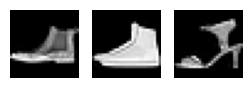

[9 7 5]


In [86]:
w = 3
fig = plt.figure(figsize=(w, 5))

# RAW images
p = os.path.join(mlflow_folder, mnist[attack_model], 'artifacts', '59.pkl')
with open(p, 'rb') as f:
    tmp = pickle.load(f)
raw = tmp[eps]['raw'][idx]
for j in range(w):
    ax = fig.add_subplot(1,w,j+1)
    ax.imshow(raw[j, :, :, 0], 'gray')
    ax.axis('off')
plt.show()
fig.savefig(f'./figures/aes_{task_name}_raw.png', dpi=300, bbox_inches='tight', pad_inches=0)
print(tmp[eps]['label'][idx][:w])

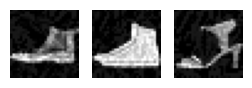

[5 9 8]


In [87]:
w = 3
fig = plt.figure(figsize=(w, 5))

# AEs by MNIST
p = os.path.join(mlflow_folder, mnist[attack_model], 'artifacts', '59.pkl')
with open(p, 'rb') as f:
    tmp = pickle.load(f)
raw = tmp[eps]['clipped'][idx]
for j in range(w):
    ax = fig.add_subplot(1,w,j+1)
    ax.imshow(raw[j, :, :, 0], 'gray')
    ax.axis('off')
plt.show()
fig.savefig(f'./figures/AEs_{task_name}_MNIST.png', dpi=300, bbox_inches='tight', pad_inches=0)
print(np.argmax(tmp[eps]['victim_prediction'][idx[tmp[eps]['is_adv']]][:w], axis=1))

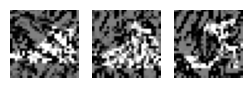

In [88]:
w = 3
fig = plt.figure(figsize=(w, 5))

# 2nd row: AEs by MNIST
p = os.path.join(mlflow_folder, mnist[attack_model], 'artifacts', '59.pkl')
with open(p, 'rb') as f:
    tmp = pickle.load(f)
perturb_mnist = (tmp[eps]['raw'][idx] - tmp[eps]['clipped'][idx])/eval(eps)
for j in range(w):
    ax = fig.add_subplot(1,w,j+1)
    ax.imshow(perturb_mnist[j, :, :, 0], 'gray')
    ax.axis('off')
plt.show()
fig.savefig(f'./figures/pert_{task_name}_MNIST.png', dpi=300, bbox_inches='tight', pad_inches=0)

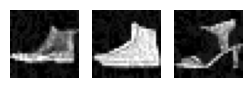

[8 9 9]


In [89]:
w = 3
fig = plt.figure(figsize=(w, 5))

# AEs by MNIST
p = os.path.join(mlflow_folder, fashion_mnist[attack_model], 'artifacts', '59.pkl')
with open(p, 'rb') as f:
    tmp = pickle.load(f)
raw = tmp[eps]['clipped'][idx]
for j in range(w):
    ax = fig.add_subplot(1,w,j+1)
    ax.imshow(raw[j, :, :, 0], 'gray')
    ax.axis('off')
plt.show()
fig.savefig(f'./figures/AEs_{task_name}_fashion_mnist.png', dpi=300, bbox_inches='tight', pad_inches=0)
print(np.argmax(tmp[eps]['victim_prediction'][idx[tmp[eps]['is_adv']]][:w], axis=1))

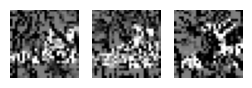

In [90]:
w = 3
fig = plt.figure(figsize=(w, 5))

# AEs by Fashion-MNIST
p = os.path.join(mlflow_folder, fashion_mnist[attack_model], 'artifacts', '59.pkl')
with open(p, 'rb') as f:
    tmp = pickle.load(f)
perturb_fnist = (tmp[eps]['raw'][idx] - tmp[eps]['clipped'][idx])/eval(eps)
for j in range(w):
    ax = fig.add_subplot(1,w,j+1)
    ax.imshow(perturb_fnist[j, :, :, 0], 'gray')
    ax.axis('off')
plt.show()
fig.savefig(f'./figures/pert_{task_name}_fashion_mnist.png', dpi=300, bbox_inches='tight', pad_inches=0)

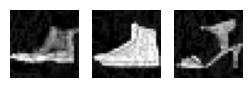

[8 9 8]


In [91]:
w = 3
fig = plt.figure(figsize=(w, 5))

# AEs by MNIST
p = os.path.join(mlflow_folder, fractal_1k[attack_model], 'artifacts', '99.pkl')
with open(p, 'rb') as f:
    tmp = pickle.load(f)
raw = tmp[eps]['clipped'][idx]
for j in range(w):
    ax = fig.add_subplot(1,w,j+1)
    ax.imshow(raw[j, :, :, 0], 'gray')
    ax.axis('off')
plt.show()
fig.savefig(f'./figures/AEs_{task_name}_fractal_1k.png', dpi=300, bbox_inches='tight', pad_inches=0)
print(np.argmax(tmp[eps]['victim_prediction'][idx[tmp[eps]['is_adv']]][:w], axis=1))

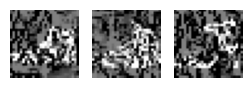

In [92]:
w = 3
fig = plt.figure(figsize=(w, 5))

# AEs by 1k
p = os.path.join(mlflow_folder, fractal_1k[attack_model], 'artifacts', '99.pkl')
with open(p, 'rb') as f:
    tmp = pickle.load(f)
perturb_1k = (tmp[eps]['raw'][idx] - tmp[eps]['clipped'][idx])/eval(eps)
for j in range(w):
    ax = fig.add_subplot(1,w,j+1)
    ax.imshow(perturb_1k[j, :, :, 0], 'gray')
    ax.axis('off')
plt.show()
fig.savefig(f'./figures/pert_{task_name}_fractal_1k.png', dpi=300, bbox_inches='tight', pad_inches=0)

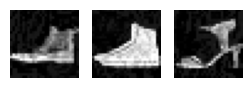

[8 9 9]


In [93]:
w = 3
fig = plt.figure(figsize=(w, 5))

# AEs by MNIST
p = os.path.join(mlflow_folder, fractal_60[attack_model], 'artifacts', '59.pkl')
with open(p, 'rb') as f:
    tmp = pickle.load(f)
raw = tmp[eps]['clipped'][idx]
for j in range(w):
    ax = fig.add_subplot(1,w,j+1)
    ax.imshow(raw[j, :, :, 0], 'gray')
    ax.axis('off')
plt.show()
fig.savefig(f'./figures/AEs_{task_name}_fractal_60.png', dpi=300, bbox_inches='tight', pad_inches=0)
print(np.argmax(tmp[eps]['victim_prediction'][idx[tmp[eps]['is_adv']]][:w], axis=1))

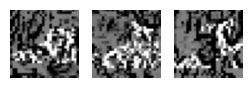

In [94]:
w = 3
fig = plt.figure(figsize=(w, 5))

# AEs by MNIST
p = os.path.join(mlflow_folder, fractal_60[attack_model], 'artifacts', '59.pkl')
with open(p, 'rb') as f:
    tmp = pickle.load(f)
perturb_60 = (tmp[eps]['raw'][idx] - tmp[eps]['clipped'][idx])/eval(eps)
for j in range(w):
    ax = fig.add_subplot(1,w,j+1)
    ax.imshow(perturb_60[j, :, :, 0], 'gray')
    ax.axis('off')
plt.show()
fig.savefig(f'./figures/pert_{task_name}_fractal_60.png', dpi=300, bbox_inches='tight', pad_inches=0)

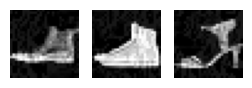

[8 9 9]


In [95]:
w = 3
fig = plt.figure(figsize=(w, 5))

with open(f'ae_origin_{task_name}.pkl', 'rb') as f:
    tmp = pickle.load(f)
raw = tmp[eps]['clipped'][idx]
for j in range(w):
    ax = fig.add_subplot(1,w,j+1)
    ax.imshow(raw[j, :, :, 0], 'gray')
    ax.axis('off')
plt.show()
fig.savefig(f'./figures/AEs_{task_name}_original.png', dpi=300, bbox_inches='tight', pad_inches=0)
print(np.argmax(tmp[eps]['victim_prediction'][idx][:w], axis=1))

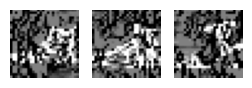

In [96]:
w = 3
fig = plt.figure(figsize=(w, 5))

with open(f'ae_origin_{task_name}.pkl', 'rb') as f:
    tmp = pickle.load(f)
perturb_ori = (tmp[eps]['raw'][idx] - tmp[eps]['clipped'][idx])/eval(eps)
for j in range(w):
    ax = fig.add_subplot(1,w,j+1)
    ax.imshow(perturb_ori[j, :, :, 0], 'gray')
    ax.axis('off')
plt.show()
fig.savefig(f'./figures/pert_{task_name}_original.png', dpi=300, bbox_inches='tight', pad_inches=0)

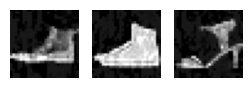

[8 8 8]


In [97]:
w = 3
fig = plt.figure(figsize=(w, 5))

p = os.path.join('dfme_result', 'res', f'{task_name}', 'medium', '22.pkl')
with open(p, 'rb') as f:
    tmp = pickle.load(f)
raw = tmp[eps]['clipped'][idx].transpose(0,2,3,1)
for j in range(w):
    ax = fig.add_subplot(1,w,j+1)
    ax.imshow(raw[j, :, :, 0], 'gray')
    ax.axis('off')
plt.show()
fig.savefig(f'./figures/AEs_{task_name}_dfme.png', dpi=300, bbox_inches='tight', pad_inches=0)
print(np.argmax(tmp[eps]['victim_prediction'][idx[tmp[eps]['is_adv']]][:w], axis=1))

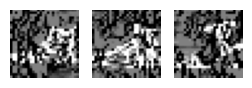

In [98]:
w = 3
fig = plt.figure(figsize=(w, 5))

with open(f'ae_origin_{task_name}.pkl', 'rb') as f:
    tmp = pickle.load(f)
perturb_ori = (tmp[eps]['raw'][idx] - tmp[eps]['clipped'][idx])/eval(eps)
for j in range(w):
    ax = fig.add_subplot(1,w,j+1)
    ax.imshow(perturb_ori[j, :, :, 0], 'gray')
    ax.axis('off')
plt.show()
fig.savefig(f'./figures/pert_{task_name}_dfme.png', dpi=300, bbox_inches='tight', pad_inches=0)

In [99]:
for i in range(10):
    print(f'\n##### {i} #####')
    print(np.mean(np.sign(perturb_ori[i]) == np.sign(perturb_mnist[i])))
    print(np.mean(np.sign(perturb_ori[i]) == np.sign(perturb_fnist[i])))
    print(np.mean(np.sign(perturb_ori[i]) == np.sign(perturb_60[i])))
    print(np.mean(np.sign(perturb_ori[i]) == np.sign(perturb_1k[i])))


##### 0 #####
0.5880102040816326
0.6160714285714286
0.6811224489795918
0.6938775510204082

##### 1 #####
0.5535714285714286
0.6160714285714286
0.6568877551020408
0.6530612244897959

##### 2 #####
0.6096938775510204
0.6505102040816326
0.7346938775510204
0.6224489795918368

##### 3 #####
0.5918367346938775
0.5880102040816326
0.6607142857142857
0.7091836734693877

##### 4 #####
0.6173469387755102
0.6096938775510204
0.6760204081632653
0.7487244897959183

##### 5 #####
0.6301020408163265
0.6568877551020408
0.6951530612244898
0.7308673469387755

##### 6 #####
0.5727040816326531
0.6275510204081632
0.7002551020408163
0.6938775510204082

##### 7 #####
0.5625
0.5943877551020408
0.6033163265306123
0.6466836734693877

##### 8 #####
0.5663265306122449
0.5497448979591837
0.5471938775510204
0.5688775510204082

##### 9 #####
0.5816326530612245
0.610969387755102
0.6568877551020408
0.7142857142857143
